In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import data

In [2]:
dane = pd.read_csv('analysis_dataset.csv')


Plot lines for each participant and for the average for the whole sample

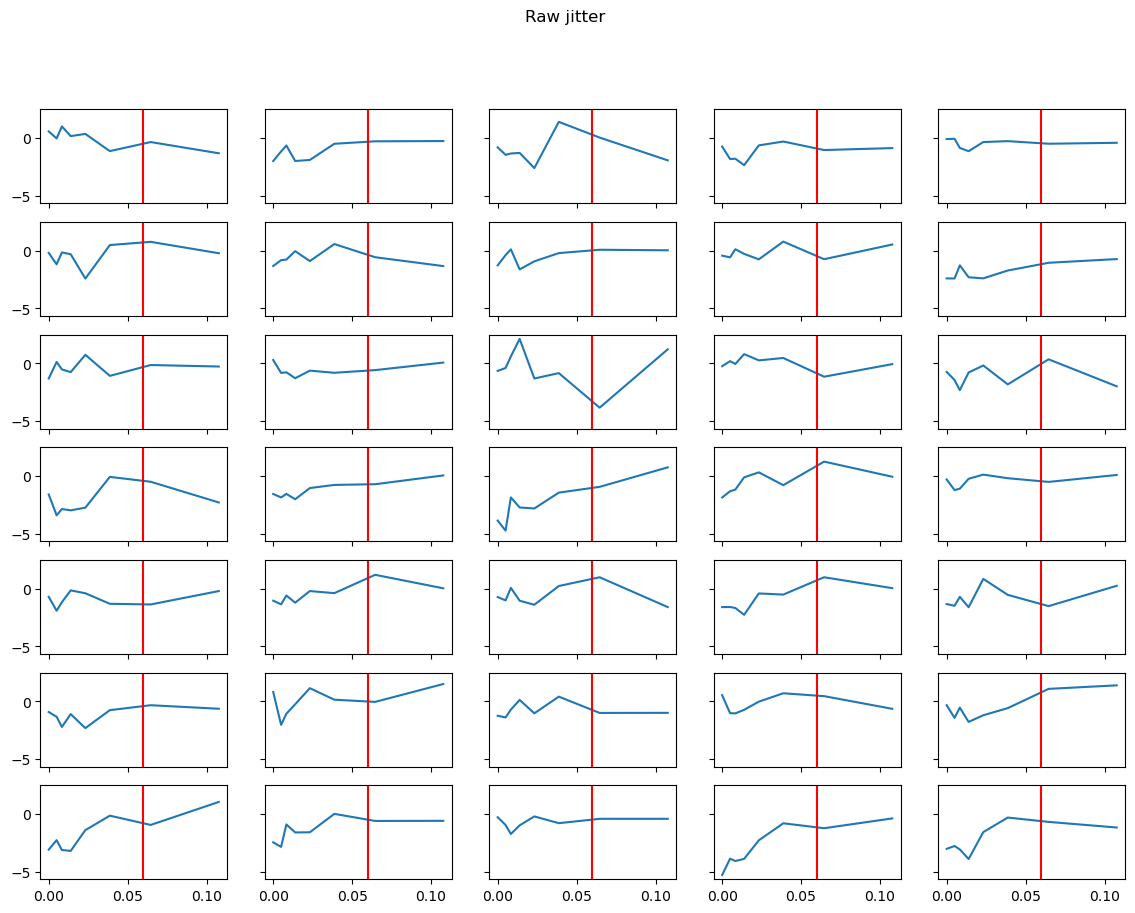

In [3]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(14,10), sharex=True, sharey=True)
for id in np.unique(dane["pid"]):
    id_data = dane[dane["pid"] == id]
    ax[int(id/5), id%5].plot(id_data["jitter_value"], id_data["mmn_amp"])
    ax[int(id/5), id%5].axvline(x=0.06, color="r")

plt.suptitle("Raw jitter")
plt.show()

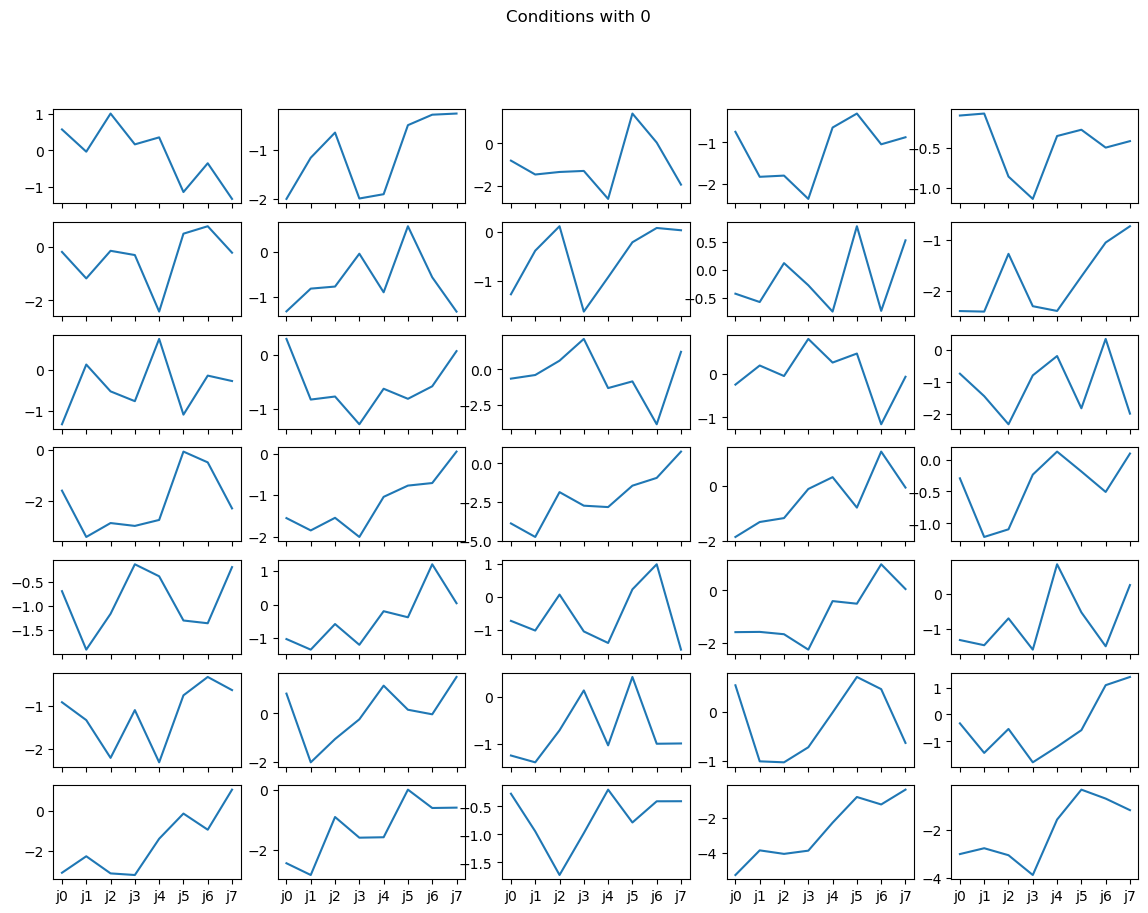

In [4]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(14,10), sharex=True, sharey=False)
for id in np.unique(dane["pid"]):
    id_data = dane[dane["pid"] == id]
    ax[int(id/5), id%5].plot(id_data["jitter"], id_data["mmn_amp"])

plt.suptitle("Conditions with 0")
plt.show()

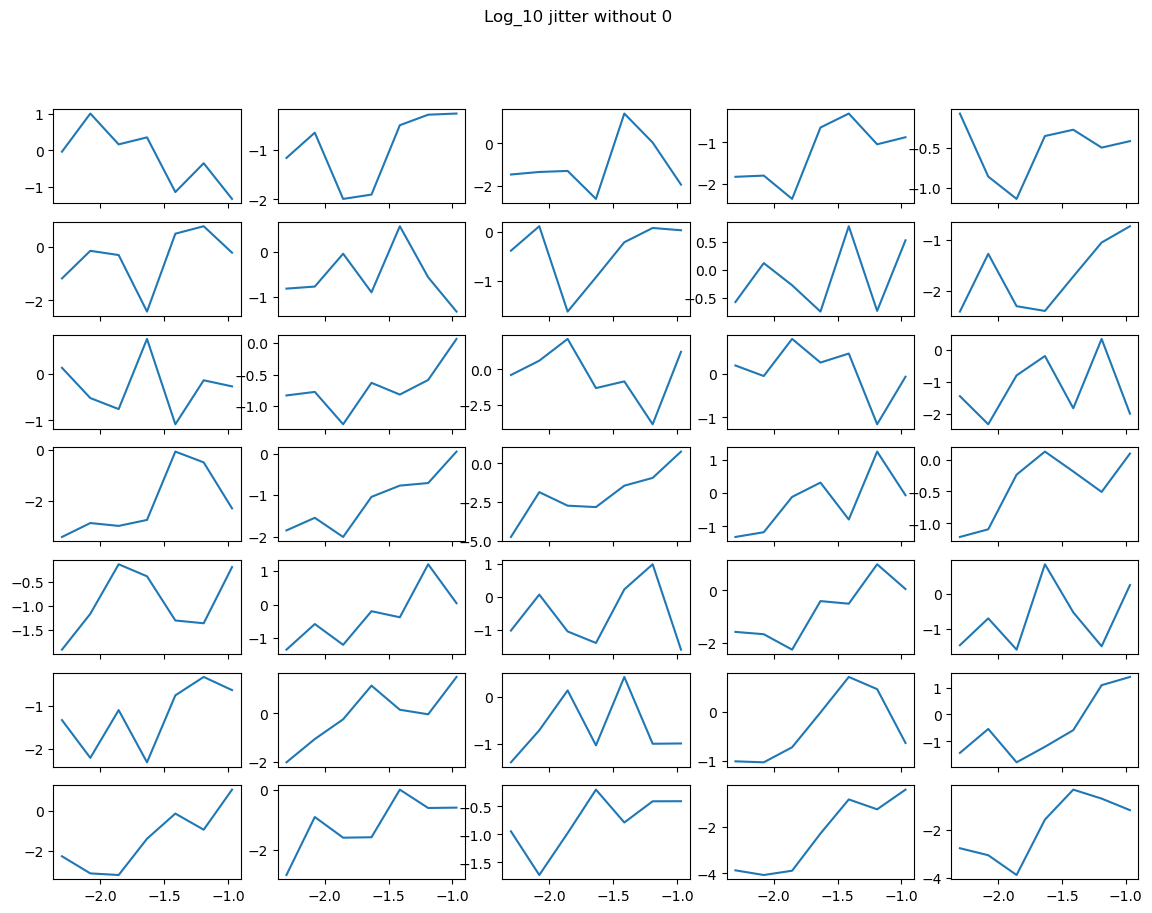

In [5]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(14,10), sharex=True, sharey=False)
for id in np.unique(dane["pid"]):
    id_data = dane[(dane["pid"] == id) & (dane["jitter_value"] > 0)]
    ax[int(id/5), id%5].plot(np.log10(id_data["jitter_value"]), id_data["mmn_amp"])

plt.suptitle("Log_10 jitter without 0")
plt.show()

In [6]:
agg_data = dane.groupby(["jitter", "jitter_value_log10"]).mmn_amp.agg('mean')
agg_data

jitter  jitter_value_log10
j0      -inf                 -1.174883
j1      -2.301030            -1.485642
j2      -2.078808            -1.133246
j3      -1.856585            -1.218385
j4      -1.634363            -0.907269
j5      -1.412141            -0.365578
j6      -1.189919            -0.392548
j7      -0.967697            -0.322761
Name: mmn_amp, dtype: float64

TypeError: 'Axes' object is not subscriptable

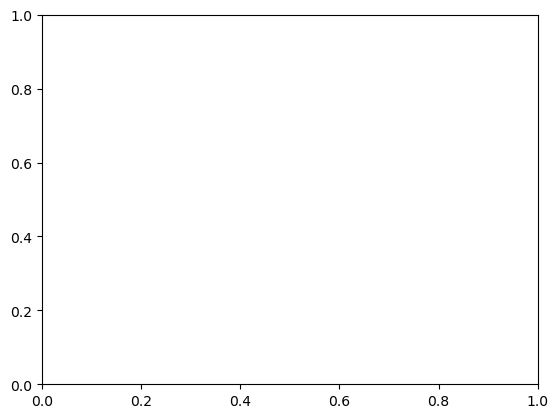

In [9]:

fig, ax = plt.subplots(nrows=1, ncols=1)
for id in np.unique(dane["pid"]):
    id_data = dane[(dane["pid"] == id) & (dane["jitter_value"] > 0)]
    ax[int(id/5), id%5].plot(np.log10(id_data["jitter_value"]), id_data["mmn_amp"])

plt.suptitle("Log_10 jitter without 0")
plt.show()

In [ ]:
l

In [8]:
agg_data2 = dane.groupby(["jitter", "jitter_value"]).mmn_amp.agg('mean')
agg_data2

jitter  jitter_value
j0      0.000000       -1.174883
j1      0.005000       -1.485642
j2      0.008341       -1.133246
j3      0.013913       -1.218385
j4      0.023208       -0.907269
j5      0.038713       -0.365578
j6      0.064577       -0.392548
j7      0.107722       -0.322761
Name: mmn_amp, dtype: float64

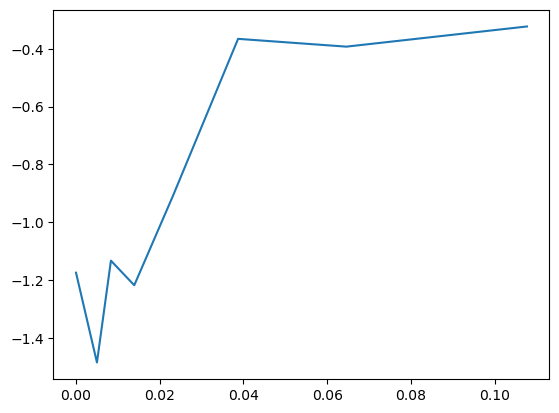

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot([x[1] for x in agg_data2.index], np.array(agg_data2))
plt.show()

/var/folders/9y/0mv908s533735jqwk6bvhkkw0000gn/T/ipykernel_5011/2593861597.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot([np.log10(x[1]) for x in agg_data2.index], np.array(agg_data2))


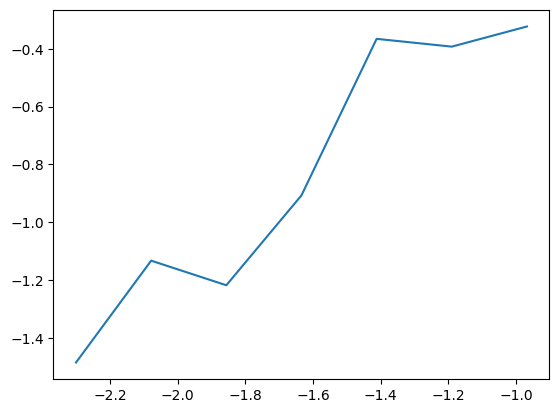

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot([np.log10(x[1]) for x in agg_data2.index], np.array(agg_data2))
plt.show()
